## Assignment : Part I -- Clustering & PCA Assignment

## Problem Statement
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.<br>
## Goals and Objectives
The requisite is:
- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
- To suggest the countries which the CEO needs to focus on the most.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Importing Data 

In [2]:
# Loading the data using Pandas
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Inspecting Dataset


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# The .shape code gives the no. of rows and columns
df.shape

(167, 10)

Here we see, that there are 167 rows and 10 columns

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Cleaning the dataframe

In [7]:
# Checking for duplicates in the country column
country = df["country"]
df[country.isin(country[country.duplicated()])].sort_values("country")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


Since the result is null it shows that there are no duplicates

In [8]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no null values and the so we can move on with the analysis

In [9]:
df_final = df

In [10]:
# A data frame is made with all the variables except country to find Pc
data = df_final.drop('country', 1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Standardising Data
- Looking for milticollinearity
- Also seeing which variables are the main factors

In [11]:
# Standardising continuous features
df = data[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]
stan_df=(df-df.mean())/df.std()
data = data.drop(['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'], 1)
data = pd.concat([data,stan_df],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692


## PCA
Since there is no need for train test split doing PCA on the original data

In [12]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
# PCA on the data
pca.fit(data)

PCA(random_state=42, svd_solver='randomized')

In [14]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [15]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

## Screeplot

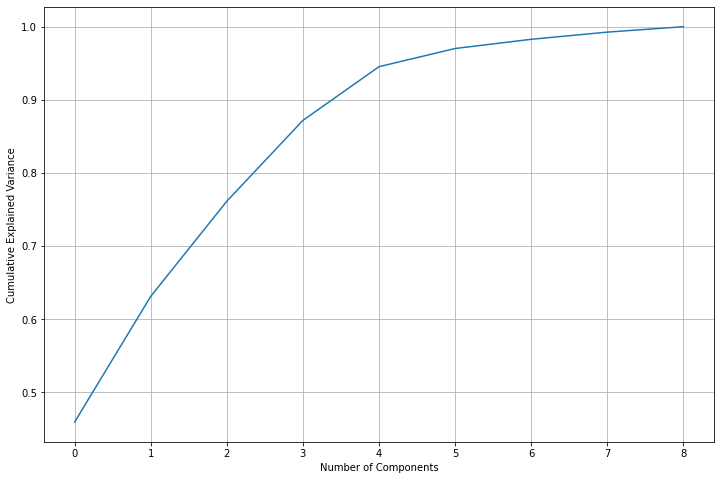

In [16]:
# Plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

Choosing PC as 4 since then there is almost 95% variance 

In [17]:
colnames = list(data.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income
5,-0.193173,-0.008404,inflation
6,0.425839,-0.222707,life_expec
7,-0.403729,0.155233,total_fer
8,0.392645,-0.046022,gdpp


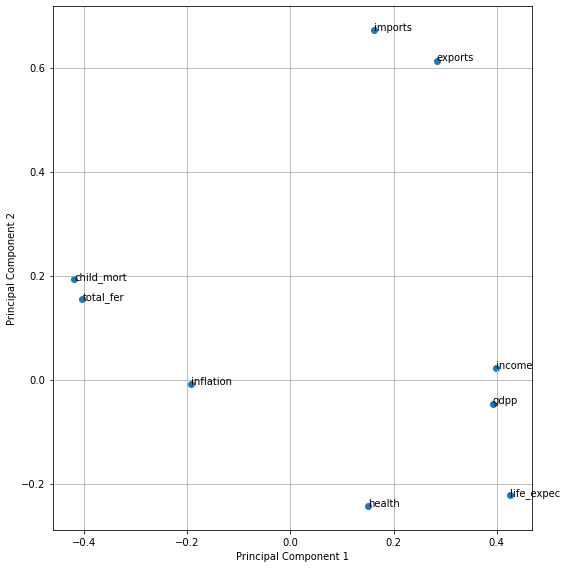

In [18]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [19]:
# Using Incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [20]:
df_train_pca = pca_final.fit_transform(data)
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1', 'PC2','PC3','PC4']
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


## Coorrelation Matrix
There shouldn't be any correlation between the PCs

In [21]:
corr_matrix = np.corrcoef(df_train_pca.transpose())

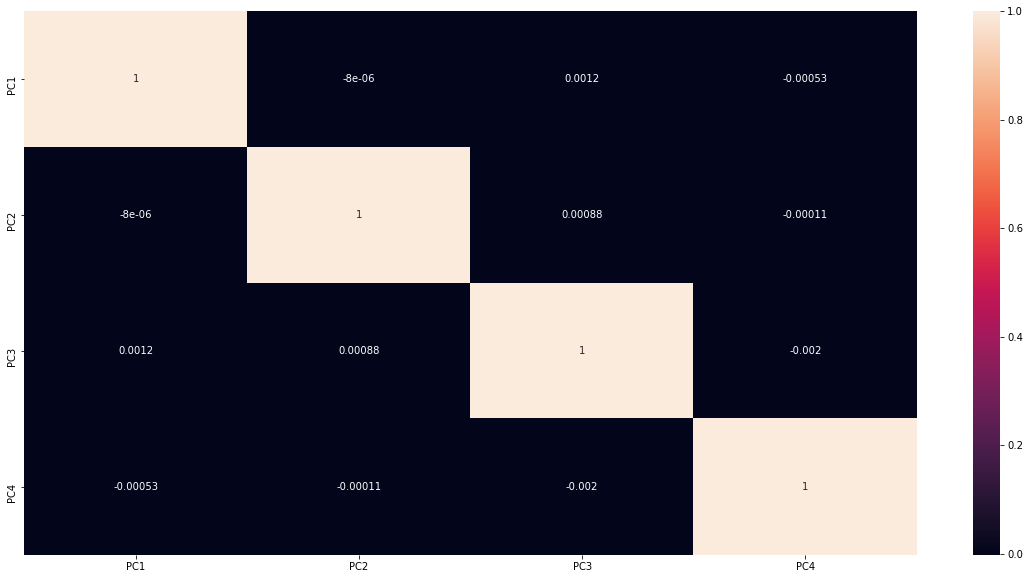

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(df_pca.corr(),annot = True)
plt.show()

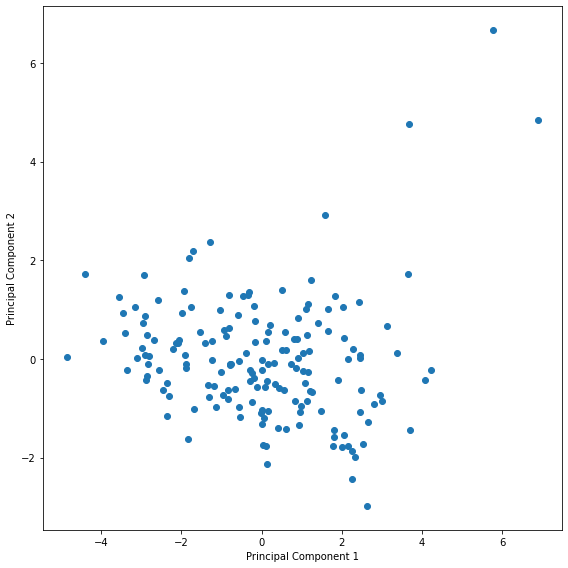

In [23]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [24]:
corr_matrix_nodiag = corr_matrix - np.diagflat(corr_matrix.diagonal())
print("maximum correlation:",corr_matrix_nodiag.max(), ", minimum correlation: ", corr_matrix_nodiag.min(),)

maximum correlation: 0.001196192509254091 , minimum correlation:  -0.00203782953555095


The correlations are almost 0

In [25]:
country = pd.DataFrame(country)
country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [26]:
df_pca = pd.concat([country, df_pca], axis=1)
df_pca.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.905050,0.088089,0.718841,0.993710
1,Albania,0.428070,-0.586096,0.320090,-1.167681
2,Algeria,-0.282140,-0.445318,-1.221462,-0.847578
3,Angola,-2.922180,1.694341,-1.517172,0.873340
4,Antigua and Barbuda,1.028893,0.130097,0.192344,-0.842275


## Handling Outliers

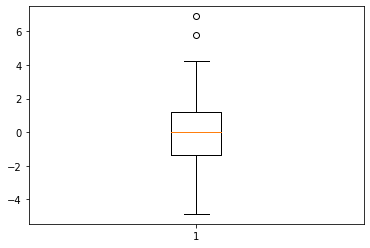

In [27]:
plt.boxplot(df_pca.PC1)
Q1 = df_pca.PC1.quantile(0.25)
Q3 = df_pca.PC1.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC1 >= Q1 - 1.5*IQR) & (df_pca.PC1 <= Q3 + 1.5*IQR)]
plt.show()

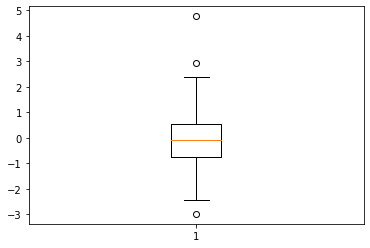

In [28]:
plt.boxplot(df_pca.PC2)
Q1 = df_pca.PC2.quantile(0.25)
Q3 = df_pca.PC2.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC2 >= Q1 - 1.5*IQR) & (df_pca.PC2 <= Q3 + 1.5*IQR)]
plt.show()

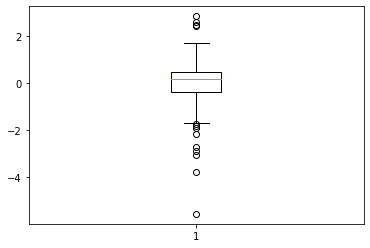

In [29]:
plt.boxplot(df_pca.PC3)
Q1 = df_pca.PC3.quantile(0.25)
Q3 = df_pca.PC3.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC3 >= Q1 - 1.5*IQR) & (df_pca.PC3 <= Q3 + 1.5*IQR)]
plt.show()

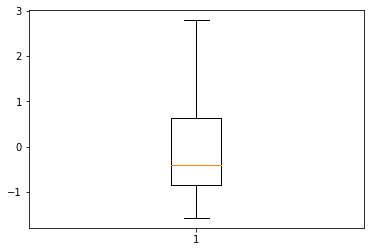

In [30]:
plt.boxplot(df_pca.PC4)
Q1 = df_pca.PC4.quantile(0.25)
Q3 = df_pca.PC4.quantile(0.75)
IQR = Q3 - Q1
df_pca = df_pca[(df_pca.PC4 >= Q1 - 1.5*IQR) & (df_pca.PC4 <= Q3 + 1.5*IQR)]
plt.show()

In [31]:
# Checking the shape of the data set
df_pca.shape

(149, 5)

In [32]:
# Making country dataset
country_1 = pd.DataFrame(df_pca["country"])
country_1.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [33]:
# Dropping country to proceed with clustering
df_pca = df_pca.drop(['country'],1)
df_pca.head()

,PC1,PC2,PC3,PC4
0,-2.905050,0.088089,0.718841,0.993710
1,0.428070,-0.586096,0.320090,-1.167681
2,-0.282140,-0.445318,-1.221462,-0.847578
3,-2.922180,1.694341,-1.517172,0.873340
4,1.028893,0.130097,0.192344,-0.842275


## Hopkins Statistics
Hopkins Statistics help us to decide whether the cluters can be formed easily or not. 

If the values are:
- 0.01 - 0.3 : Low chase of clustering
- around 0.5 : Random 
- 0.7 - 0.99 : High chance of clustering

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [35]:
hopkins(df_pca)

0.6858569855087835

Since the value is between 0.7 to  0.99, there is a high chance of clustering.

## K- Means

In [36]:
# Kmeans with K=3
model_clus4 = KMeans(n_clusters = 3, max_iter=50)
model_clus4.fit(df_pca)

KMeans(max_iter=50, n_clusters=3)

## Silhouette Analysis
- Value of the silhouette score range is in between -1 to 1.
- A score closer to 1 : The data point is very similar to other data points in the cluster
- A score closer to -1 : The data point is not similar to the data points in its cluster.

In [37]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_pca)
    sse_.append([k, silhouette_score(df_pca, kmeans.labels_)])

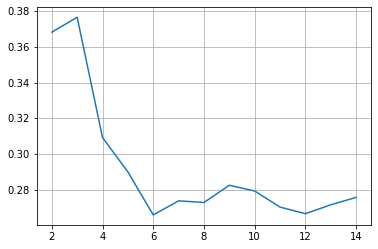

In [38]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.grid()
plt.show()

## Sum of Squared Distances

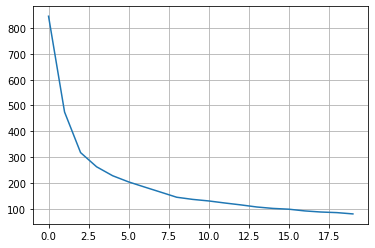

In [39]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd)
plt.grid()
plt.show()

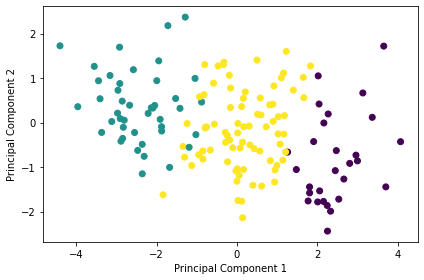

In [40]:
plt.scatter(df_pca['PC1'], df_pca['PC2'],c=model_clus4.labels_)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

## Analysis of clusters formed

In [41]:
df_pca.index = pd.RangeIndex(len(df_pca.index))

df_pca_km = pd.concat([df_pca, pd.Series(model_clus4.labels_)], axis=1)

df_pca_km.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']

df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.905050,0.088089,0.718841,0.993710,1
1,0.428070,-0.586096,0.320090,-1.167681,2
2,-0.282140,-0.445318,-1.221462,-0.847578,2
3,-2.922180,1.694341,-1.517172,0.873340,1
4,1.028893,0.130097,0.192344,-0.842275,2


In [42]:
df_pca_km.shape

(149, 5)

In [43]:
# Merging country and the above data set
df_pca_km = pd.merge(df_pca_km,country_1,on=df_pca_km['PC1'])
df_pca_km = df_pca_km.drop('key_0', 1)
df_pca_km.head()

,PC1,PC2,PC3,PC4,ClusterID,country
0,-2.905050,0.088089,0.718841,0.993710,1,Afghanistan
1,0.428070,-0.586096,0.320090,-1.167681,2,Albania
2,-0.282140,-0.445318,-1.221462,-0.847578,2,Algeria
3,-2.922180,1.694341,-1.517172,0.873340,1,Angola
4,1.028893,0.130097,0.192344,-0.842275,2,Antigua and Barbuda


In [44]:
df_country_clusterid1 = pd.merge(df_pca_km,df_final,on='country',how='inner')
df_country_clusterid1.head()

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [45]:
km_clusters_child_mort = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).exports.mean())
km_clusters_health = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).health.mean())
km_clusters_imports = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).imports.mean())
km_clusters_income = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).gdpp.mean())
km_clusters_PC1 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC1.mean())
km_clusters_PC2 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC2.mean())
km_clusters_PC3 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC3.mean())
km_clusters_PC4 = pd.DataFrame(df_country_clusterid1.groupby(["ClusterID"]).PC4.mean())

In [46]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp,km_clusters_PC1,km_clusters_PC2,km_clusters_PC3,km_clusters_PC4], axis=1)
df.columns = ["ClusterID", "child_mort_mean", "exports_mean", "health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean","PC1_mean","PC2_mean","PC3_mean","PC4_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean,PC1_mean,PC2_mean,PC3_mean,PC4_mean
0,0,4.521429,45.200000,9.670714,43.389286,37360.714286,1.154571,80.289286,1.740714,40603.571429,2.445401,-0.830759,0.326261,0.772250
1,1,92.732558,29.604884,6.069535,39.495349,4077.511628,10.460116,59.379070,5.055349,1977.558140,-2.428783,0.364019,0.061477,0.641638
2,2,22.135897,40.183192,6.223718,47.273922,11697.051282,6.989987,72.805128,2.281667,6012.717949,0.166819,-0.146430,0.023138,-0.795092
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting

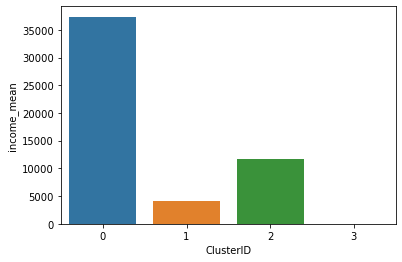

In [47]:
sns.barplot(x=df.ClusterID, y=df.income_mean)
plt.show()

Net income per person is the lowest in ClusterID = 0

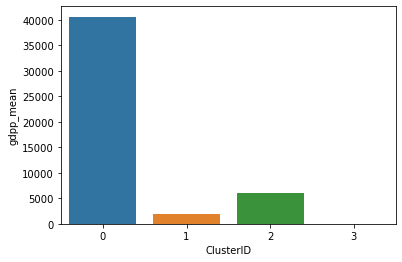

In [48]:
sns.barplot(x=df.ClusterID, y=df.gdpp_mean)
plt.show()

The GDP per capita is the lowest in ClusterID = 0

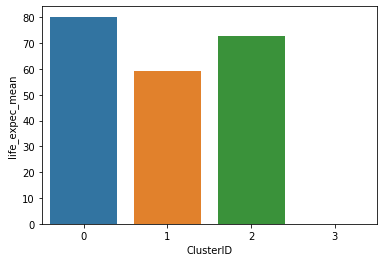

In [49]:
sns.barplot(x=df.ClusterID, y=df.life_expec_mean)
plt.show()

The average number of years a new born child would live is the lowest in ClusterID = 0

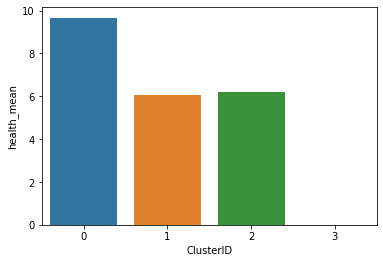

In [50]:
sns.barplot(x=df.ClusterID, y=df.health_mean)
plt.show()

Total health spending is the lowest in ClusterID = 0

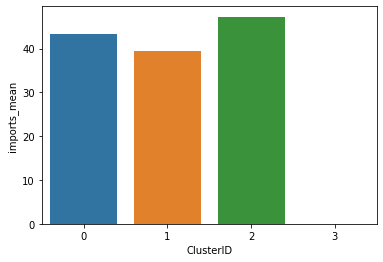

In [51]:
sns.barplot(x=df.ClusterID, y=df.imports_mean)
plt.show()

Imports of goods and services is the lowest in ClusterID = 0

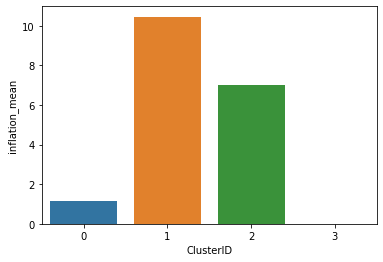

In [52]:
sns.barplot(x=df.ClusterID, y=df.inflation_mean)
plt.show()

The measurement of the annual growth rate is the highest in ClusterID = 0

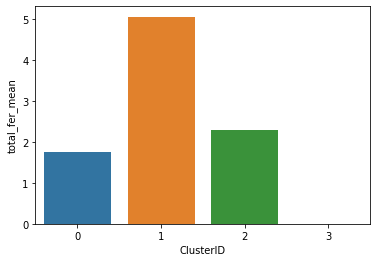

In [53]:
sns.barplot(x=df.ClusterID, y=df.total_fer_mean)
plt.show()

The number of children that would be born is the highest in ClusterID = 0

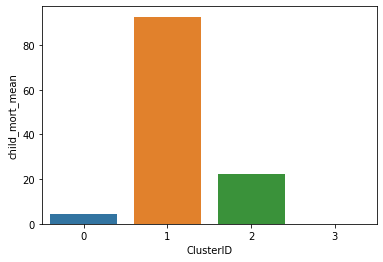

In [54]:
sns.barplot(x=df.ClusterID, y=df.child_mort_mean)
plt.show()

Child Mortality rate is the highest in ClusterID = 0

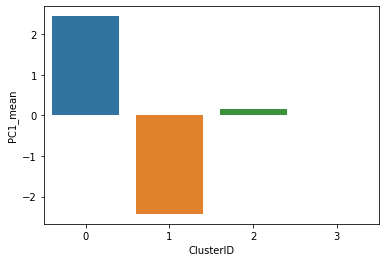

In [55]:
sns.barplot(x=df.ClusterID, y=df.PC1_mean)
plt.show()

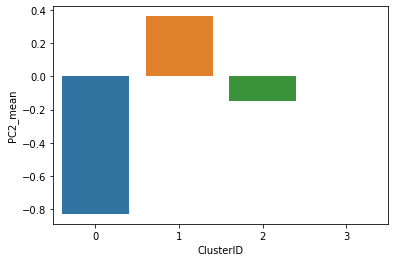

In [56]:
sns.barplot(x=df.ClusterID, y=df.PC2_mean)
plt.show()

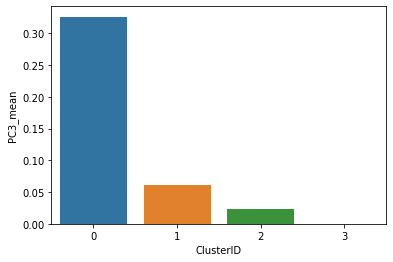

In [57]:
sns.barplot(x=df.ClusterID, y=df.PC3_mean)
plt.show()

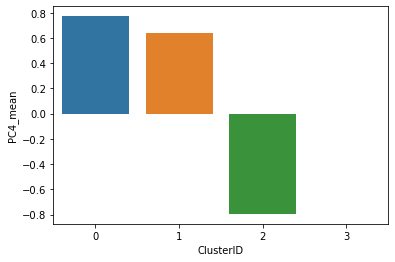

In [58]:
sns.barplot(x=df.ClusterID, y=df.PC4_mean)
plt.show()

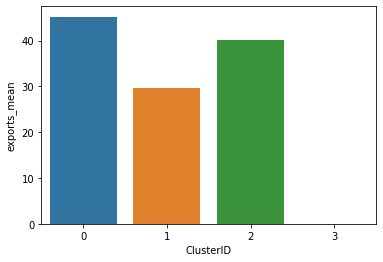

In [59]:
sns.barplot(x=df.ClusterID, y=df.exports_mean)
plt.show()

## Heirarchical Clustering

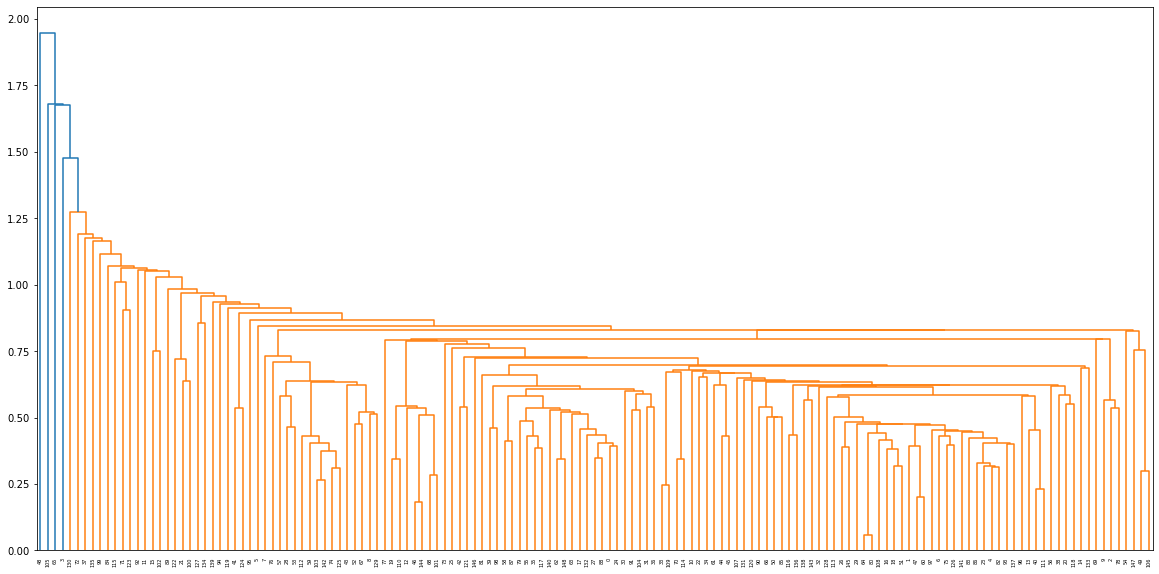

In [60]:
plt.figure(figsize = (20,10))
mergings = linkage(df_pca, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

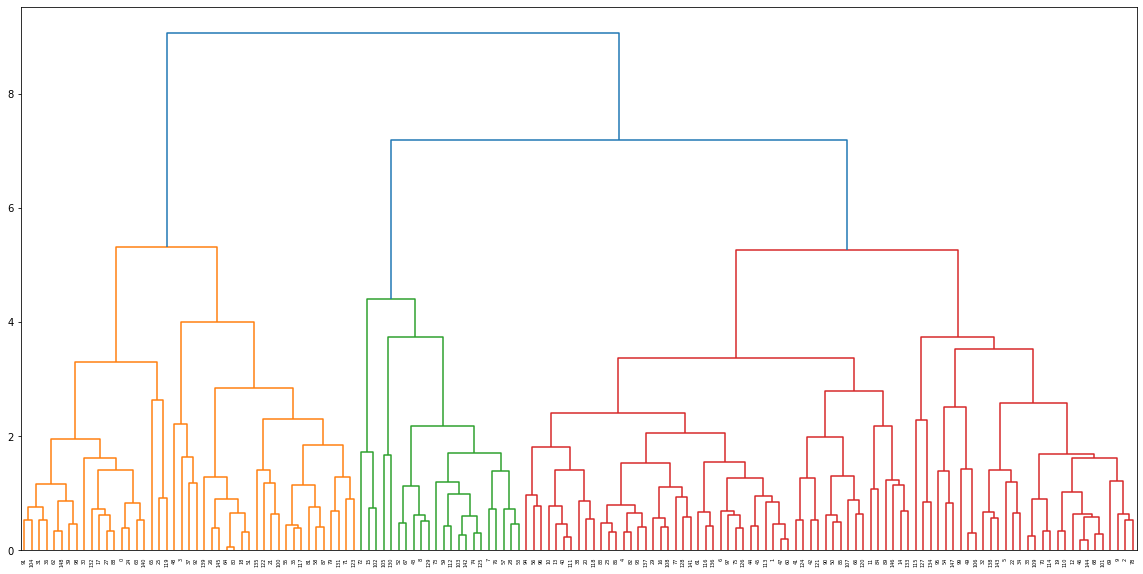

In [61]:
plt.figure(figsize = (20,10))
mergings = linkage(df_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [62]:
df_country_clusterid1

,PC1,PC2,PC3,PC4,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.905050,0.088089,0.718841,0.993710,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0.428070,-0.586096,0.320090,-1.167681,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.282140,-0.445318,-1.221462,-0.847578,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,-2.922180,1.694341,-1.517172,0.873340,1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1.028893,0.130097,0.192344,-0.842275,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-0.848366,-0.639288,-0.591583,-0.723766,2,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
145,-0.820419,0.627187,0.342185,-0.699272,2,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
146,0.501259,1.403790,0.321252,-1.112667,2,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
147,-1.876860,-0.093174,-1.052183,0.056231,1,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [63]:
df1 = df_country_clusterid1.loc[df_country_clusterid1['ClusterID'] == 0]
result = pd.DataFrame(df1.country)
result

,country
7,Australia
8,Austria
10,Bahamas
15,Belgium
28,Canada
41,Cyprus
42,Czech Republic
43,Denmark
52,Finland
53,France


# Final Conclusion


**The countries that require help the most are listed below:**

- Afghanistan
- Angola
- Benin
- Botswana
- Burkina Faso
- Burundi
- Cameroon
- Central African Republic
- Chad
- Comoros
- Congo, Dem. Rep.
- Congo, Rep.
- Cote d'Ivoire
- Equatorial Guinea
- Eritrea
- Gabon
- Gambia
- Ghana
- Guinea
- Guinea-Bissau
- Haiti
- Iraq
- Kenya
- Kiribati
- Lao
- Lesotho
- Liberia
- Madagascar
- Malawi
- Mali
- Mauritania
- Mozambique
- Namibia
- Niger
- Nigeria
- Pakistan
- Rwanda
- Senegal
- Sierra Leone
- South Africa
- Sudan
- Tanzania
- Timor-Leste
- Togo
- Uganda
- Yemen
- Zambia

**These countries have:**

- very low rate of net income per person, GDP per capita, average number of years a new born child would live, total health spending and imports of goods and services. 

- very high rate of measurement of the annual growth rate, number of children that would be born and child mortality rate.

**It is clear that these countries require very quick aid in terms of money, education and services.**